In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#bring in the six packs
df_orgin = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/scrap_price_with_more_missing.csv')

print(f"Columns ▶ {df_orgin.columns}")
print(f"Shape ▶ {df_orgin.shape}")

Columns ▶ Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')
Shape ▶ (205, 26)


# **데이터 전처리를 위한 결측치 확인**

In [9]:
# 결측치 개수 확인 (열별로)
missing_counts = df_orgin.isnull().sum()

# 결측치 비율 확인 (열별로)
missing_ratio = df_orgin.isnull().mean()

# 결측치 내역 종합 데이터프레임
missing_df = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_ratio (%)': missing_ratio * 100
})

# 결측치가 존재하는 열만 필터링 (선택사항)
missing_df = missing_df[missing_df['missing_count'] > 0]

print(missing_df)

             missing_count  missing_ratio (%)
doornumbers              6           2.926829
wheelbase                8           3.902439
curbweight              10           4.878049
enginetype               8           3.902439
fuelsystem              10           4.878049
stroke                  16           7.804878
horsepower              14           6.829268
peakrpm                 10           4.878049
citympg                 10           4.878049
price                   10           4.878049


# **데이터 결측치 제거**

In [10]:
df=df_orgin.dropna(axis=0)
print(f"Shape ▶ {df.shape}")

Shape ▶ (122, 26)


In [11]:
# 가격을 기준으로 다른 데이터와 비교 분석
base='price'
df[base].describe()

,price
count,122.000000
mean,13593.463115
std,8635.950146
min,5151.000000
25%,7701.250000
50%,10120.000000
75%,16482.500000
max,45400.000000


# **왜도 및 첨도 확인**

In [ ]:
print("Skewness: %f" % df[base].skew())
print("Kurtosis: %f" % df[base].kurt())

Skewness: 1.696162
Kurtosis: 2.458219


Price를 기준으로 왜도와 첨도를 분석하였다.

왜도는 오른쪽에 꼬리를 가지며 왼쪽에 데이터가 많은 Postive Skewness 라는 걸 알 수 있다.

첨도는 표준편차에 데이터가 몰려있고 이상치 존재 가능성이 높다는 걸 알 수 있다.

# **시각화**

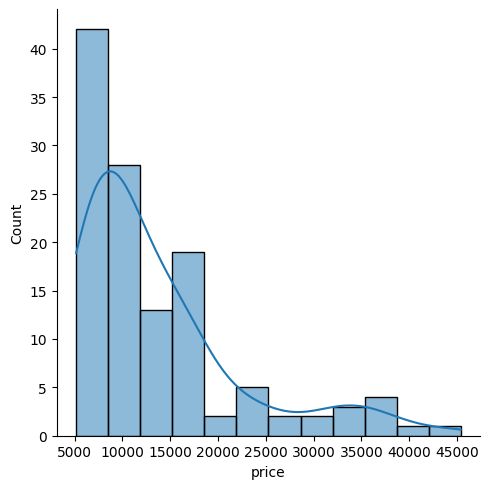

In [ ]:
sns.displot(df[base], kde=True)

오른쪽으로 꼬리가 길고 저가(왼쪽)에 데이터가 몰려 있는 분포를 알 수 있다.

<Axes: xlabel='enginesize', ylabel='price'>

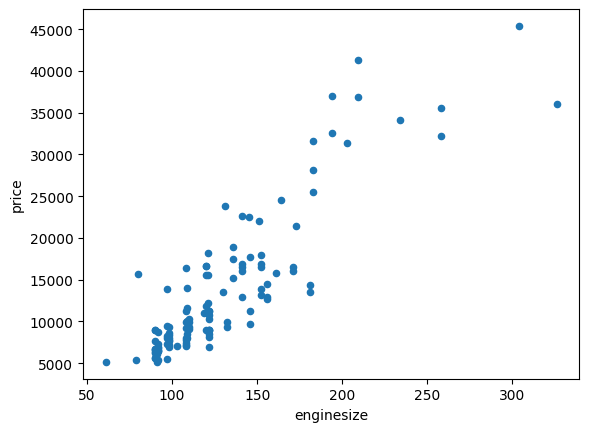

In [ ]:
var1='enginesize'
data = pd.concat([df[base], df[var1]], axis=1)
data.plot.scatter(x=var1, y=base)

엔진크기가 커질수록 가격이 상승하는걸 알 수 있다.

엔진크기 250부터 데이터가 급격히 감소하며 이상치 데이터를 알 수 있다.

<Axes: xlabel='curbweight', ylabel='price'>

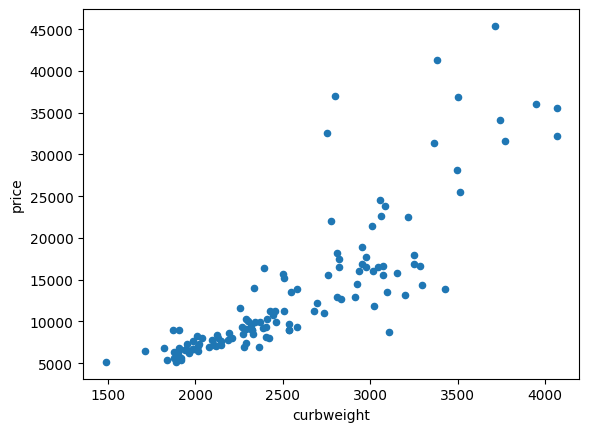

In [ ]:
var2='curbweight'
data = pd.concat([df[base], df[var2]], axis=1)
data.plot.scatter(x=var2, y=base)

전반적으로 중량이 증가할수록 가격이 증가하는 경향이 있음을 알 수 있다.

3500~4000 범위의 중량이 높은 영역에서 데이터가 흩어져 있는걸 알 수 있다.

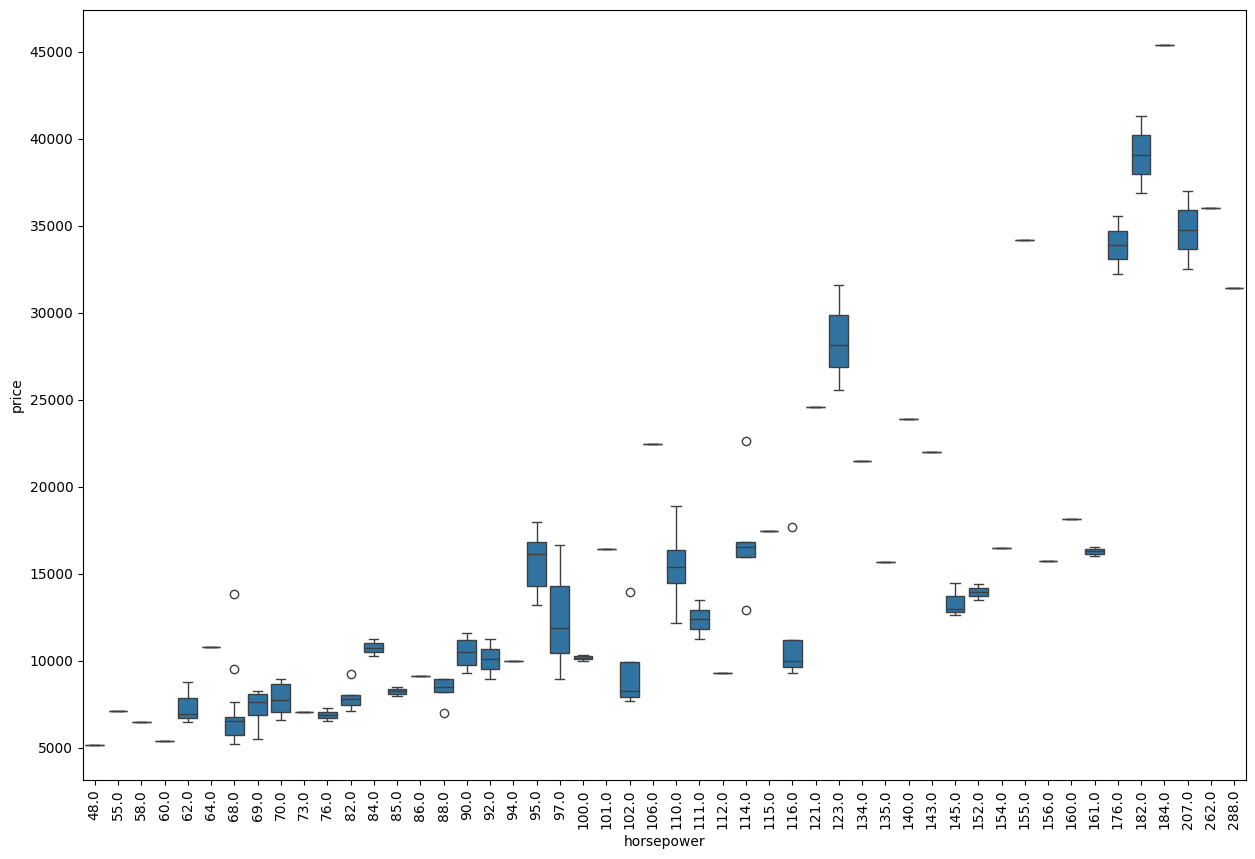

In [ ]:
var3='horsepower'
data= pd.concat([df[base], df[var3]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x=var3, y=base, data=data)
plt.xticks(rotation=90);

마력이 높을수록 가격이 상승하는 경향이 나타남.

높은 마력의 차량일 수록 상자자체가 위로 길게 늘어나 있고, 이상치가 나타나 가격의 변동성이 커짐.

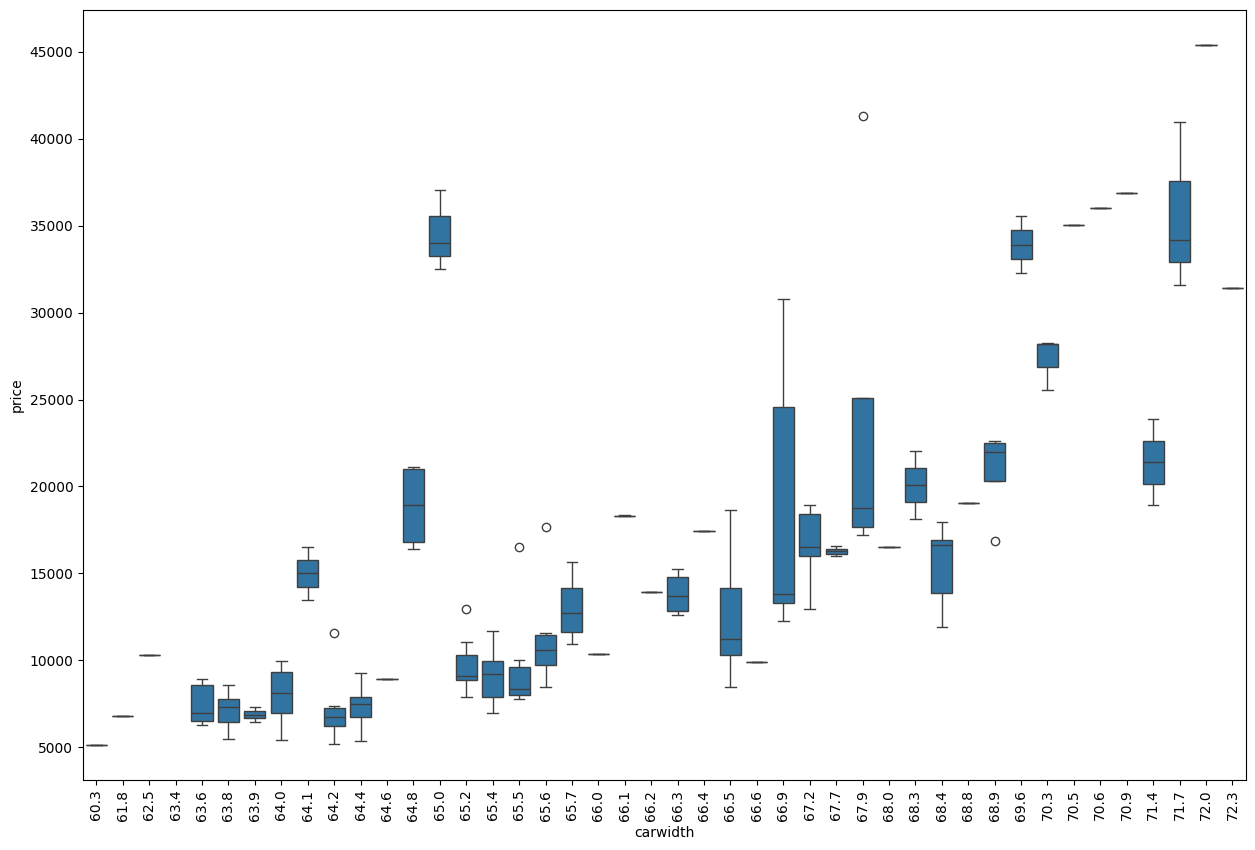

In [ ]:
var4='carwidth'
data= pd.concat([df[base], df[var4]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x=var4, y=base, data=data)
plt.xticks(rotation=90);

전반적으로 차량 너비가 증가할수록 가격이 상승하는 명확한 양의 상관관계가 나타남.

차량이 넓어질수록 가격의 중앙값이 높아지는 추세가 뚜렷함.

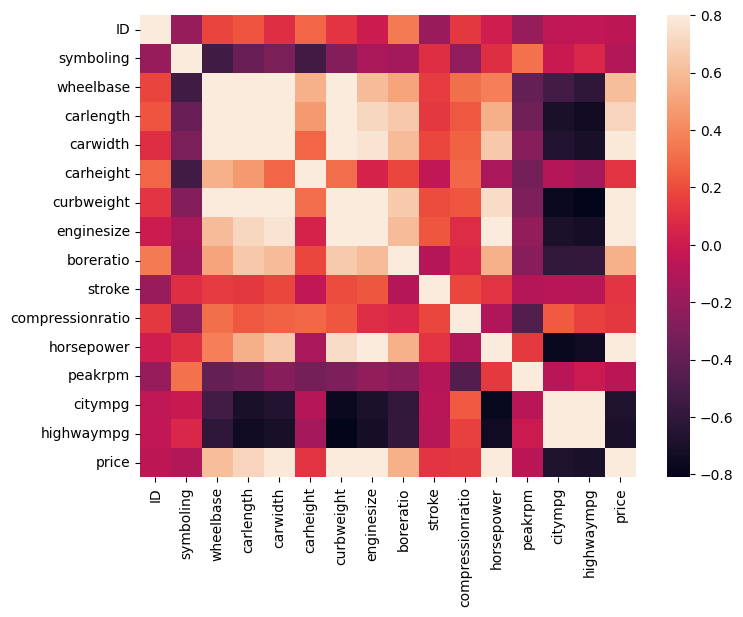

In [ ]:
corrmat= df.select_dtypes(include='number').corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.8, square=False)
plt.show()

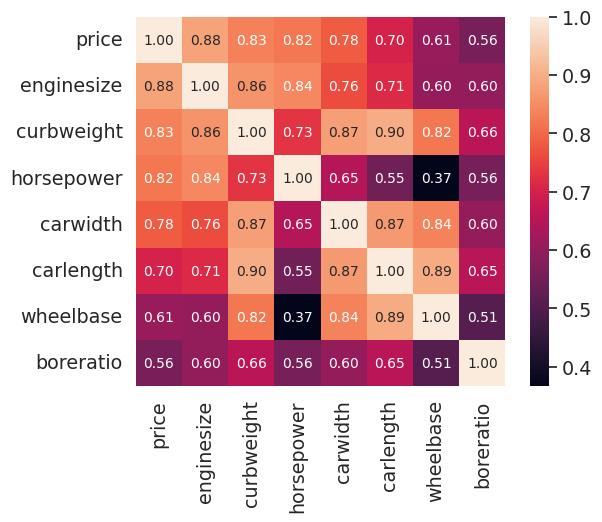

In [ ]:
k = 8 #number of variables for heatmap
corrmat = df.corr(numeric_only=True)
cols = corrmat.nlargest(k, base)[base].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
cols=corrmat.nlargest(k, base)[base]
cols

,price
price,1.000000
enginesize,0.882569
curbweight,0.833269
horsepower,0.820787
carwidth,0.783985
carlength,0.702672
wheelbase,0.608553
boreratio,0.560868


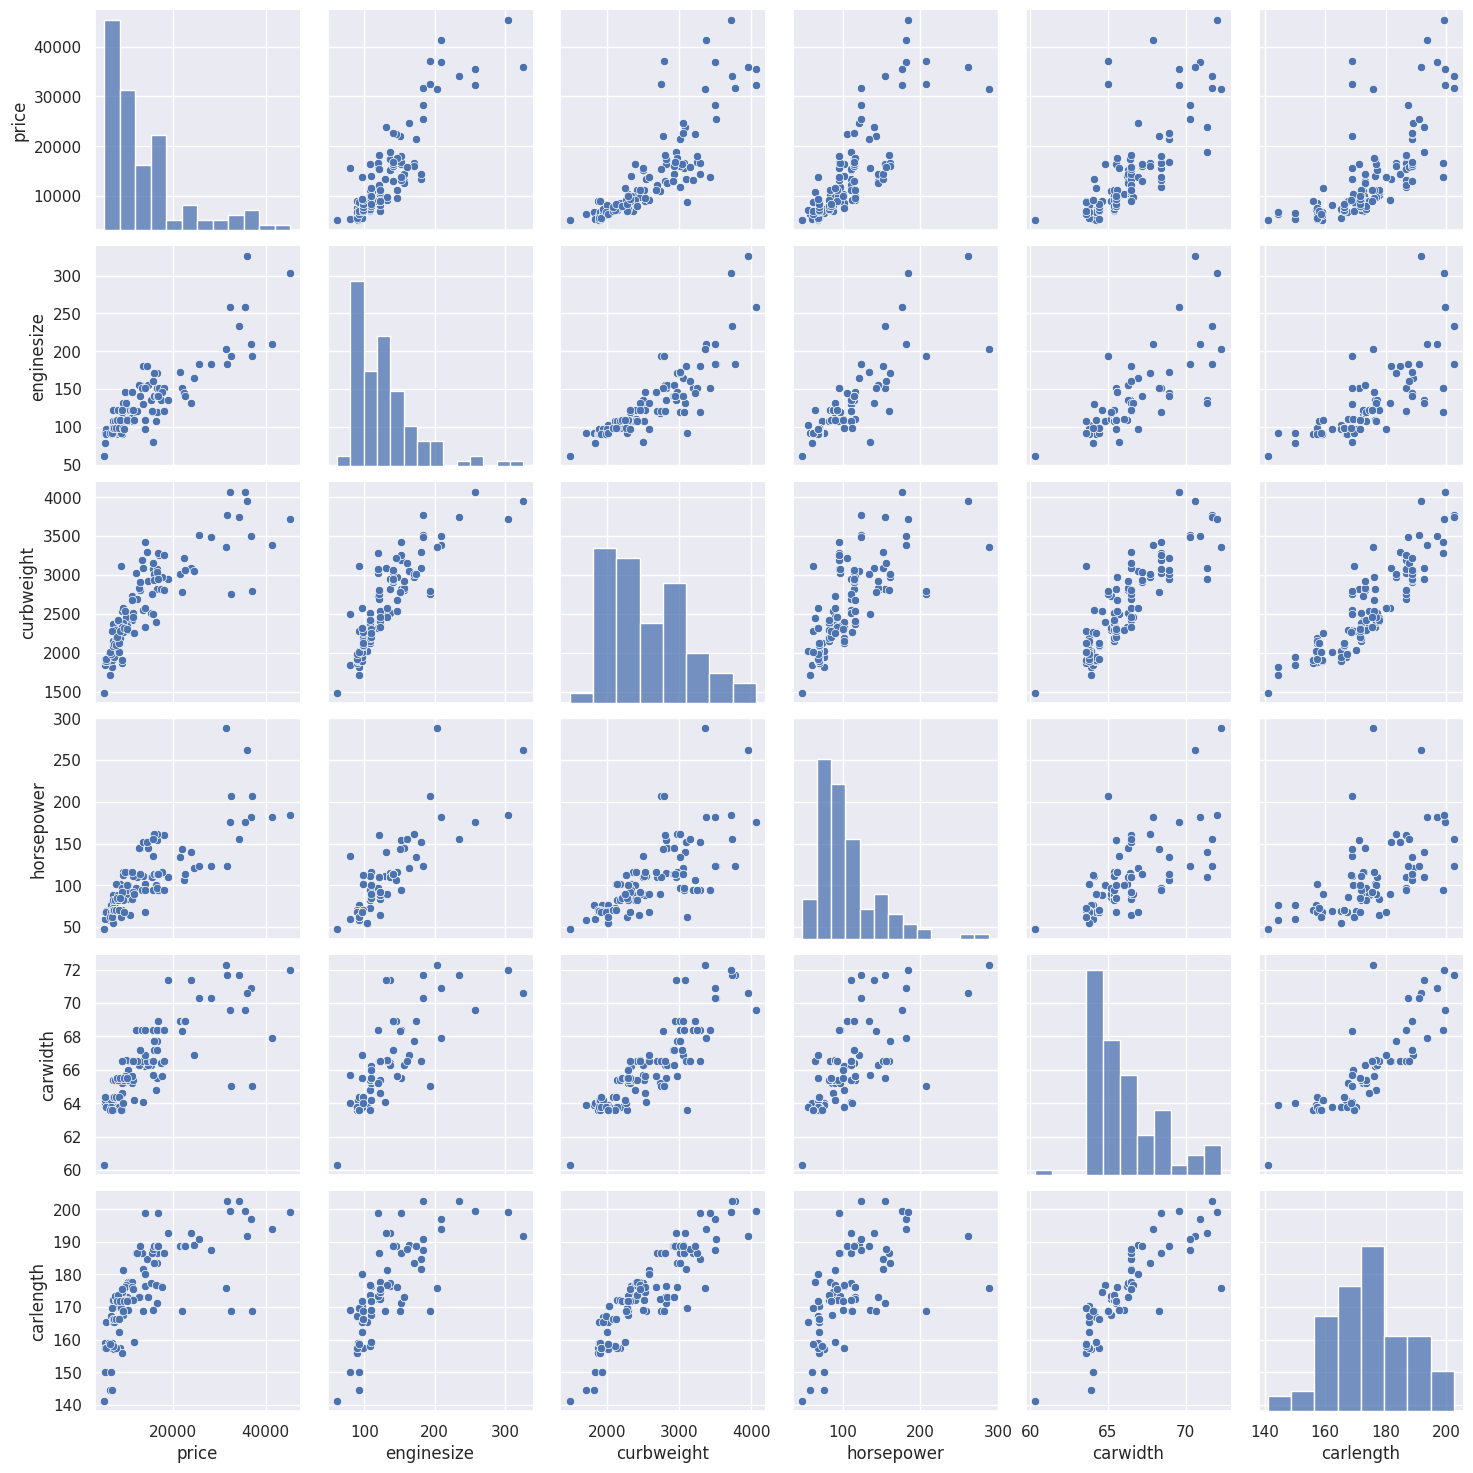

In [ ]:
sns.set()
sns.pairplot(df[['price', 'enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength']], size = 2.5)
plt.show()

위의 시각화 자료를 분석한 결과 price와 가장 높은 상관관계를 보이는 건 enginesize이고 그 다음으로는 curbweight, hoursepower 순이다.

wheelbase, carlength, carwidth도 서로 상관관계를 보인다

# **이상치 제거**

<Axes: xlabel='enginesize', ylabel='price'>

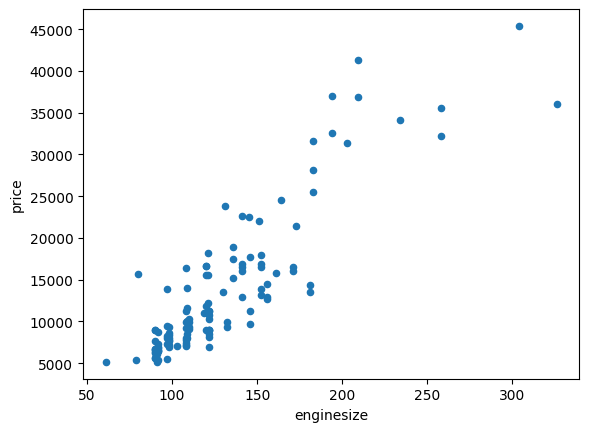

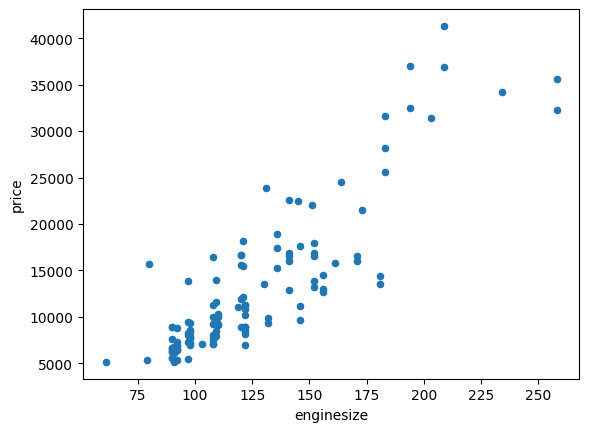

In [19]:
data = pd.concat([df[base], df[var1]], axis=1)
data.plot.scatter(x=var1, y=base)

# 이상치 제거
dtop_df=df.drop(df[df[var1] > 300].index)

dtop_concat_df = pd.concat([dtop_df[base], dtop_df[var1]], axis=1)
dtop_concat_df.plot.scatter(x=var1, y=base)

engine 크기가 300 이상인 값 2개를 제거하였다.

# **Log transformation 진행하기**

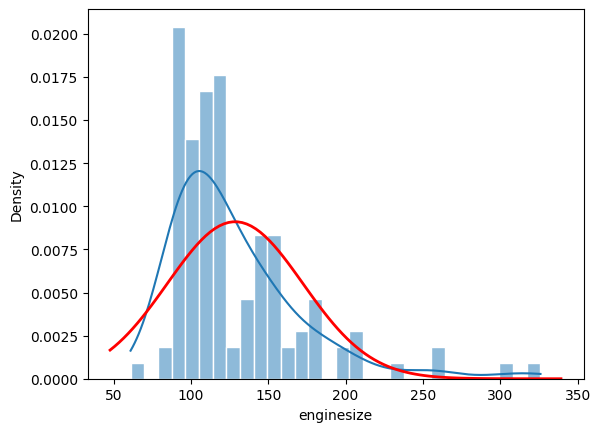

In [28]:
# 히스토그램 그리기
sns.histplot(df[var1], bins=30, kde=True, stat='density', edgecolor='white')

# 정규분포 곡선 추가
mu, std = norm.fit(df[var1])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.show()

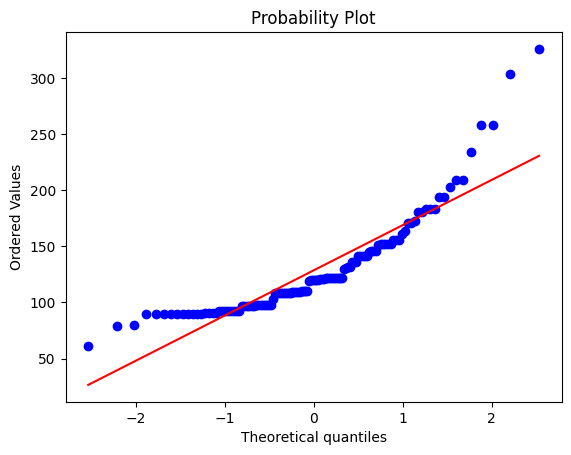

In [29]:
import matplotlib.pyplot as plt
from scipy import stats

fig=plt.figure()
res=stats.probplot(df[var1], plot=plt)
plt.show()

In [30]:
logTransformation=np.log(df[var1])

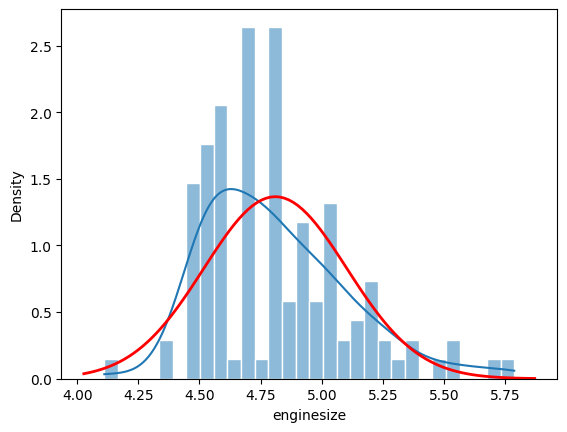

In [31]:
# 히스토그램 그리기
sns.histplot(logTransformation, bins=30, kde=True, stat='density', edgecolor='white')

# 정규분포 곡선 추가
mu, std = norm.fit(logTransformation)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.show()

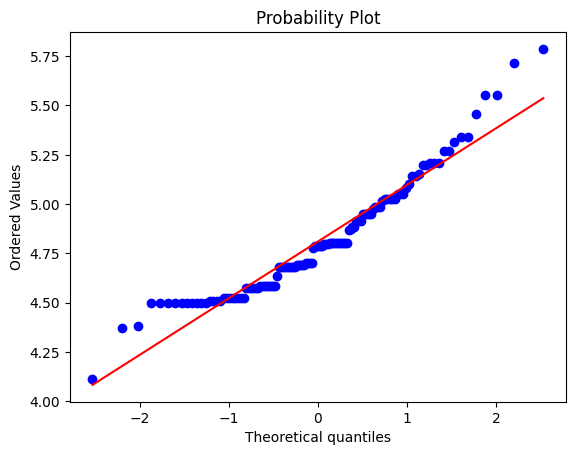

In [32]:
fig=plt.figure()
res=stats.probplot(logTransformation, plot=plt)
plt.show()

log transformation을 진행하고 분포 정규화가 되었고, 이상치가 완화 되는걸 확인 할 수 있다.